# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
#importingLibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loadingData
df=pd.read_csv("cencus.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#checking shape
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
#checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)

In [8]:
cat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [9]:
#checking the value couts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Occupation
 Prof-specialty      

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

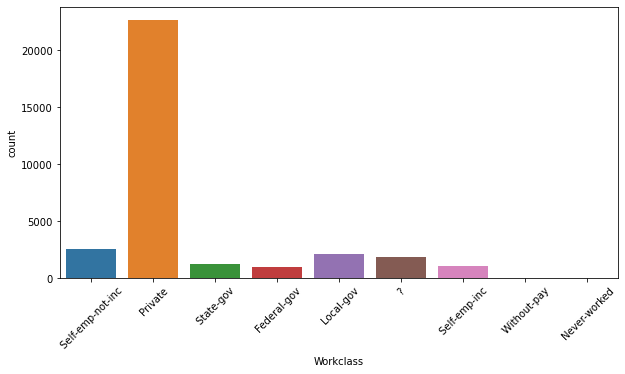

In [10]:
#Workclass
plt.figure(figsize=(10,5))
sns.countplot("Workclass", data=df)
plt.xticks(rotation=45)

In [11]:
#the Private has the highest number of the count and people with Without pay and never worked has lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

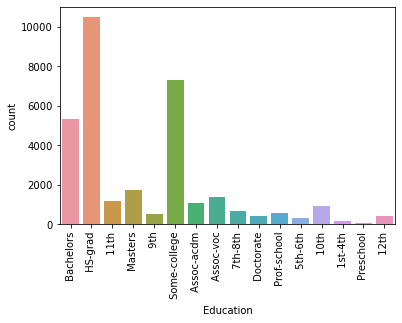

In [12]:
#Education
sns.countplot("Education", data=df)
plt.xticks(rotation=90)

In [13]:
#people with hs grad has very high count, however there are very few people with higher qualification

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

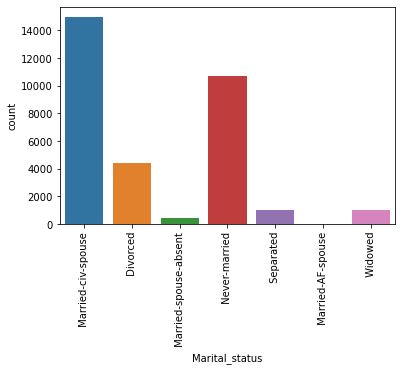

In [14]:
#AMarital-status
sns.countplot("Marital_status", data=df)
plt.xticks(rotation=90)

In [15]:
#Married civilian spouse are high in count also never married people are good in numbers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

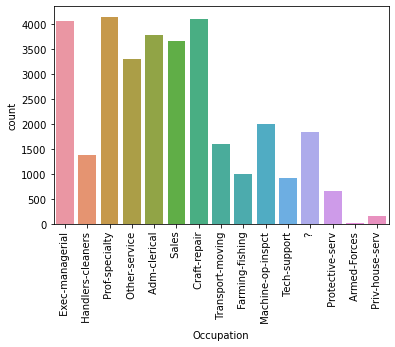

In [16]:
#Occupation
sns.countplot("Occupation", data=df)
plt.xticks(rotation=90)

In [17]:
#Exec-managerial, Prof-specialty,Adm-clerical, sales, craft-repair are the most prefered works

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

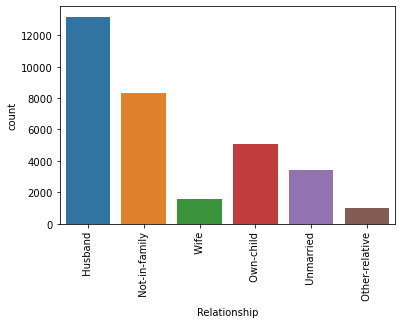

In [18]:
#Relationship
sns.countplot("Relationship", data=df)
plt.xticks(rotation=90)

In [19]:
#people with fanily are reater in number

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

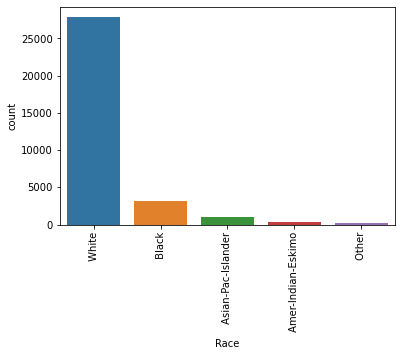

In [20]:
#Race
sns.countplot("Race", data=df)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

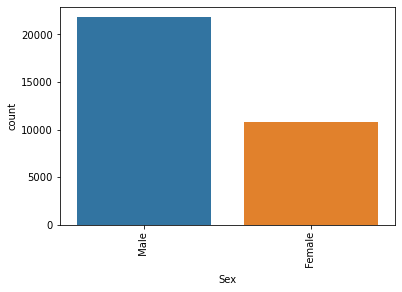

In [21]:
#Sex
sns.countplot("Sex", data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

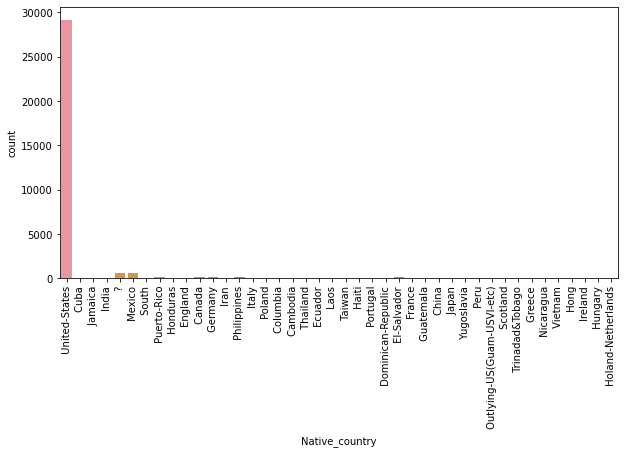

In [22]:
#Native_counry
plt.figure(figsize=(10,5))
sns.countplot("Native_country", data=df)
plt.xticks(rotation=90)

In [23]:
#nearly all th eprople are from united states

<AxesSubplot:xlabel='Income', ylabel='count'>

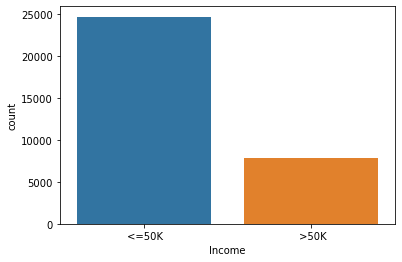

In [24]:
#Income
sns.countplot("Income", data=df)

In [25]:
#the dataset is highly imbalance

In [26]:
#extracting flot and int type
ncat=[]
for x in df.dtypes.index:
    if df.dtypes[x]!="object":
        ncat.append(x)

In [27]:
ncat

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [28]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

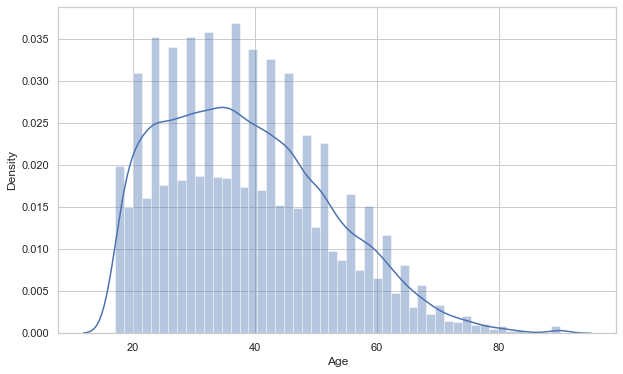

In [29]:
#item Age
histogram(df,"Age")

In [30]:
#the maximum nuber of people fallls in the age group of 21 to 45, also there is the patetrn that every consecutive age is very high

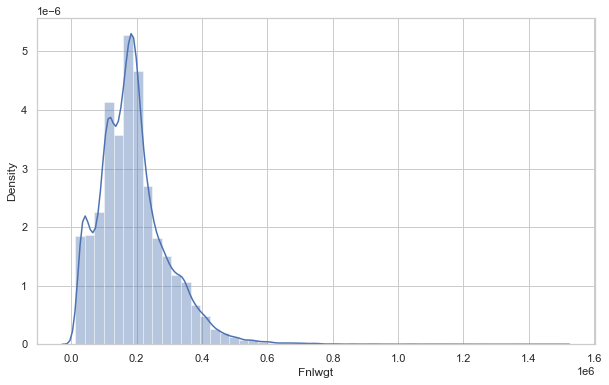

In [31]:
#item Fnlwgt
histogram(df,"Fnlwgt")

In [32]:
#this is highly skwed data

<AxesSubplot:xlabel='Education_num', ylabel='count'>

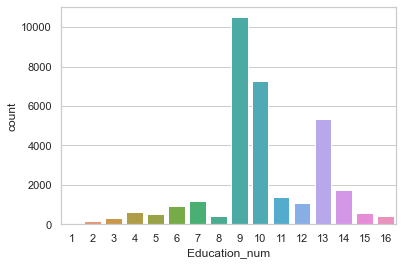

In [33]:
#Education num
sns.countplot("Education_num", data=df)

In [34]:
#the education num 9,10,12 are highest in number, however rest are very low in comaprison

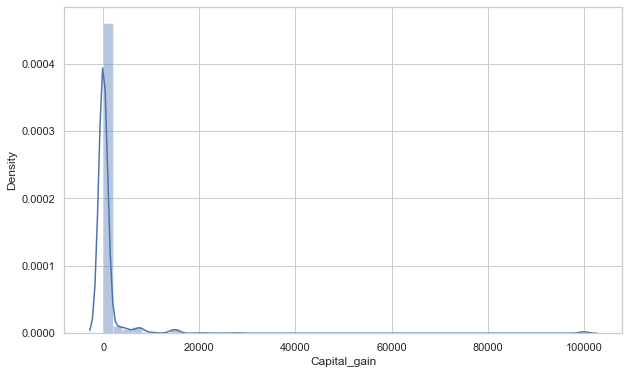

In [35]:
#Capital_gain
histogram(df,"Capital_gain")

In [36]:
#the data contains huge outlilers

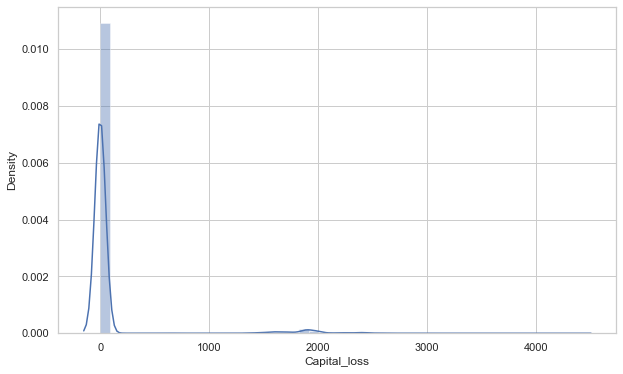

In [37]:
#Capital_loss
histogram(df,"Capital_loss")

In [38]:
#the data contains huge outlilers

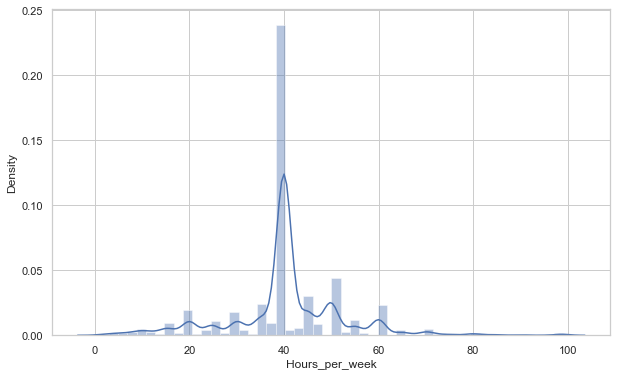

In [39]:
#item Hours per week
histogram(df,"Hours_per_week")

In [40]:
#the average hours per week is 40.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

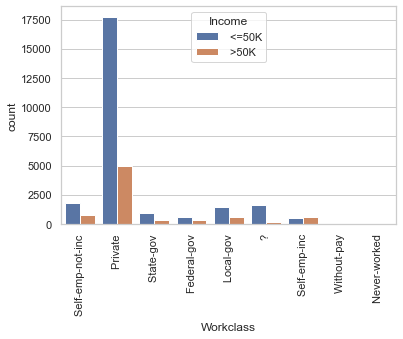

In [41]:
#Workclass/income
plt.xticks(rotation=90)
sns.countplot("Workclass", data=df, hue="Income")

In [42]:
#the workclass private has highest income. it contains both the catogery in majority.

<AxesSubplot:xlabel='Education', ylabel='count'>

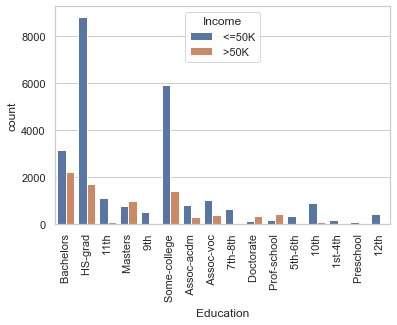

In [43]:
#Education/income
plt.xticks(rotation=90)
sns.countplot("Education", data=df, hue="Income")

In [44]:
#the people with hsgrad and come college experiance earn highest. however it is also the case that these groups contains most numbers of people

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

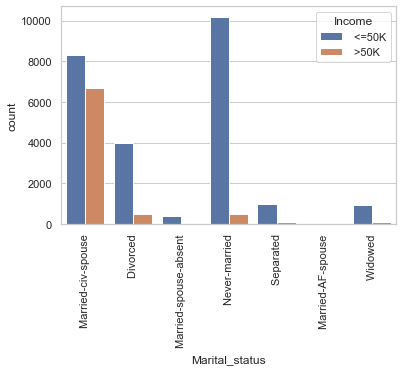

In [45]:
#Marital_status/income
plt.xticks(rotation=90)
sns.countplot("Marital_status", data=df, hue="Income")

In [46]:
#people who are not married has highest number of 50k plus income

<AxesSubplot:xlabel='Occupation', ylabel='count'>

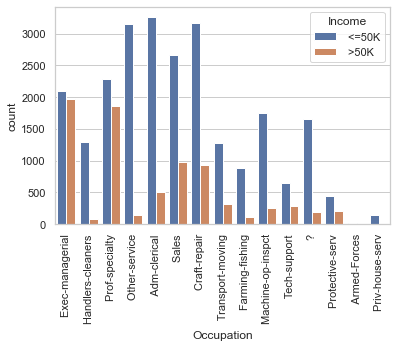

In [47]:
#Occupation/income
plt.xticks(rotation=90)
sns.countplot("Occupation", data=df, hue="Income")

In [48]:
#the occupation which has highest 50k plus income also has hightest less 50k plus income

<AxesSubplot:xlabel='Relationship', ylabel='count'>

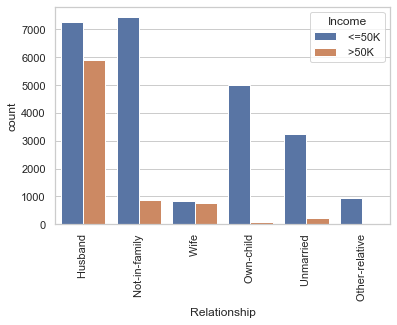

In [49]:
#Relationship/income
plt.xticks(rotation=90)
sns.countplot("Relationship", data=df, hue="Income")

In [50]:
#the not in family category peple has highest 50 k plus income with low less 50k plus income

<AxesSubplot:xlabel='Race', ylabel='count'>

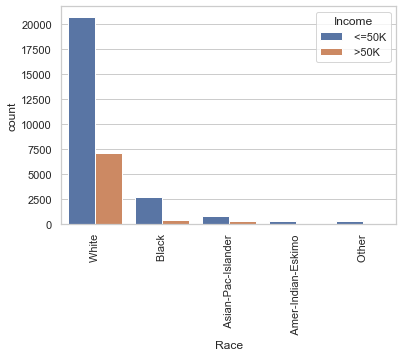

In [51]:
#Race
plt.xticks(rotation=90)
sns.countplot("Race", data=df, hue="Income")

In [52]:
#the white people has highest income among all caegory

<AxesSubplot:xlabel='Sex', ylabel='count'>

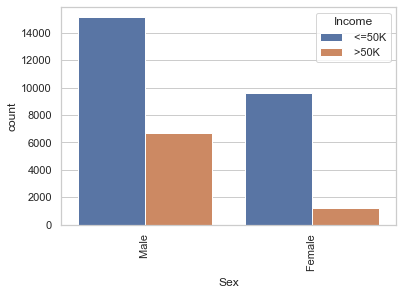

In [53]:
#sex/income
plt.xticks(rotation=90)
sns.countplot("Sex", data=df, hue="Income")

In [54]:
#male has more earning than female in both the category

<AxesSubplot:xlabel='Native_country', ylabel='count'>

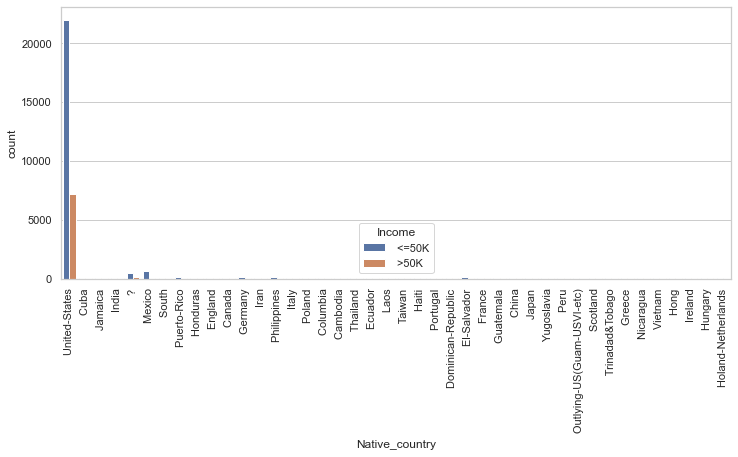

In [55]:
#Native_country
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot("Native_country", data=df, hue="Income")

In [56]:
#people who belongs from united state has earnings apart that every other people from different orign has approx nill income

In [57]:
#removing ? symbols with mode as it contain alot of rows. removing it would lead to loss of the data
df["Workclass"]=df["Workclass"].replace("?", "Private")
df["Occupation"]=df["Occupation"].replace("?", "Prof-specialty")
df["Native_country"]=df["Native_country"].replace("?", "United-States")

In [58]:
#labeling the categorical values by label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Workclass"]=le.fit_transform(df["Workclass"].values)
df["Education"]=le.fit_transform(df["Education"].values)
df["Marital_status"]=le.fit_transform(df["Marital_status"].values)
df["Occupation"]=le.fit_transform(df["Occupation"].values)
df["Relationship"]=le.fit_transform(df["Relationship"].values)
df["Race"]=le.fit_transform(df["Race"].values)
df["Sex"]=le.fit_transform(df["Sex"].values)
df["Native_country"]=le.fit_transform(df["Native_country"].values)
df["Income"]=le.fit_transform(df["Income"].values)

In [59]:
#checking the coffecient
cor=df.corr()

<AxesSubplot:>

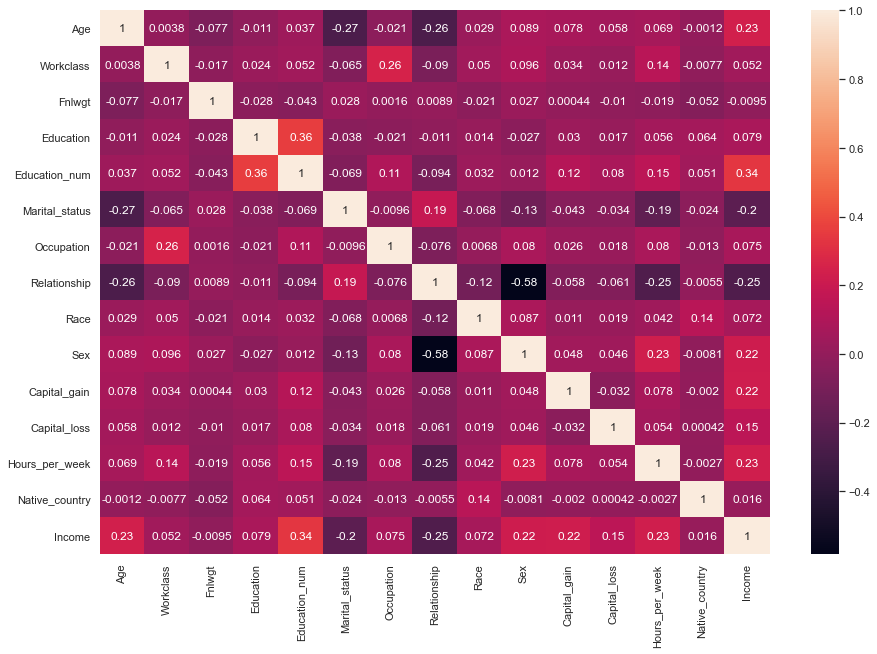

In [60]:
#using heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [61]:
#fnlwgt and Native_country is nearly close to zero 
#Education_num is highly correlated to income and relationship is negatively related to income

In [62]:
#droping Fnlwgt and Nativecountry
df.drop(["Fnlwgt","Native_country"], axis=1,inplace=True)

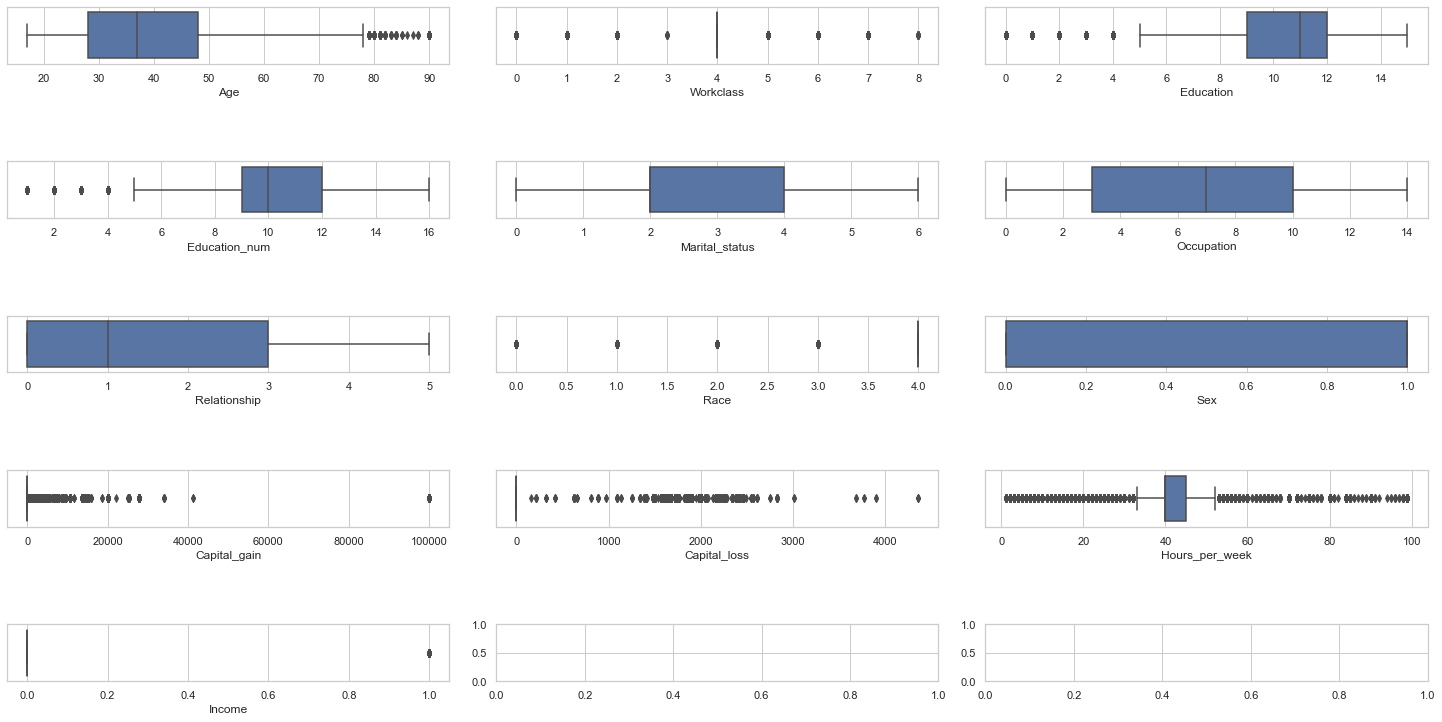

In [63]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=3,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [64]:
#reemoving outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.shape, df.shape

((28913, 13), (32560, 13))

In [65]:
#checking for skewness
df_new.skew()

Age                0.488165
Workclass         -0.750153
Education         -0.944000
Education_num     -0.166807
Marital_status    -0.047676
Occupation         0.126218
Relationship       0.749605
Race              -2.545435
Sex               -0.684264
Capital_gain       4.940434
Capital_loss      29.678160
Hours_per_week    -0.358997
Income             1.327046
dtype: float64

In [66]:
#spliting data in x and y
x=df_new.drop("Income", axis=1)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,9,13,2,4,0,4,1,0,0,13
1,38,4,11,9,0,6,1,4,1,0,0,40
2,53,4,1,7,2,6,0,2,1,0,0,40
3,28,4,9,13,2,10,5,2,0,0,0,40
4,37,4,12,14,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38
32556,40,4,11,9,2,7,0,4,1,0,0,40
32557,58,4,11,9,6,1,4,4,0,0,0,40
32558,22,4,11,9,4,1,3,4,1,0,0,20


In [67]:
y=df_new["Income"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 28913, dtype: int32

In [68]:
#treating skewness with power transform
from sklearn.preprocessing import power_transform

In [69]:
d1=power_transform(x)
d1=pd.DataFrame(d1,columns=x.columns)

In [70]:
#checking for skewness
d1.skew()

Age               -0.017599
Workclass          0.077108
Education         -0.314583
Education_num      0.024641
Marital_status    -0.128540
Occupation        -0.183931
Relationship       0.107205
Race              -2.475418
Sex               -0.684264
Capital_gain       3.069869
Capital_loss      25.012197
Hours_per_week     0.105937
dtype: float64

In [72]:
x=d1

In [73]:
#importing libraries for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

<AxesSubplot:xlabel='Income', ylabel='count'>

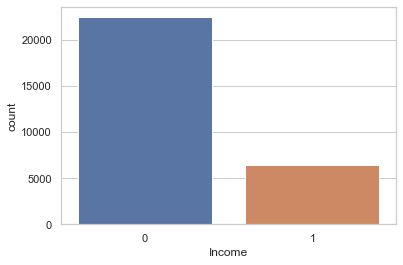

In [74]:
#the dependent varible is unbalenced
sns.countplot(y)

In [75]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:xlabel='Income', ylabel='count'>

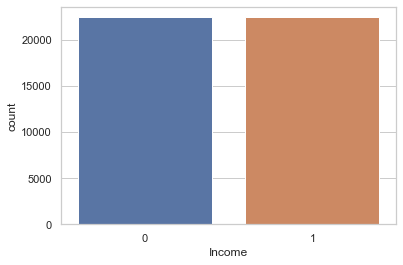

In [76]:
#balanced data
sns.countplot(y)

In [77]:
#spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31428, 12), (13470, 12), (31428,), (13470,))

In [78]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))
    
    
    
    
    
    
    print("cross_val_score",cross_val_score(model,x,y,cv=5).mean())

In [79]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.89      0.88      0.88      6823
           1       0.88      0.89      0.88      6647

    accuracy                           0.88     13470
   macro avg       0.88      0.88      0.88     13470
weighted avg       0.88      0.88      0.88     13470

The accuracy score is:  0.8827765404602821
The confusion matrix is:
    
     [[5984  839]
 [ 740 5907]]
cross_val_score 0.8875908919872675


In [80]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           0       0.88      0.75      0.81      6823
           1       0.78      0.90      0.83      6647

    accuracy                           0.82     13470
   macro avg       0.83      0.82      0.82     13470
weighted avg       0.83      0.82      0.82     13470

The accuracy score is:  0.8225686711210096
The confusion matrix is:
    
     [[5115 1708]
 [ 682 5965]]
cross_val_score 0.8225758445032966


In [81]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.82      0.67      0.74      6823
           1       0.71      0.85      0.78      6647

    accuracy                           0.76     13470
   macro avg       0.77      0.76      0.76     13470
weighted avg       0.77      0.76      0.75     13470

The accuracy score is:  0.7568671121009651
The confusion matrix is:
    
     [[4547 2276]
 [ 999 5648]]
cross_val_score 0.7620161148098347


In [82]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.89      0.77      0.83      6823
           1       0.79      0.90      0.85      6647

    accuracy                           0.84     13470
   macro avg       0.84      0.84      0.84     13470
weighted avg       0.84      0.84      0.84     13470

The accuracy score is:  0.8373422420193022
The confusion matrix is:
    
     [[5269 1554]
 [ 637 6010]]
cross_val_score 0.8493921674701996


In [83]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.85      0.86      0.85      6823
           1       0.85      0.85      0.85      6647

    accuracy                           0.85     13470
   macro avg       0.85      0.85      0.85     13470
weighted avg       0.85      0.85      0.85     13470

The accuracy score is:  0.8524870081662955
The confusion matrix is:
    
     [[5855  968]
 [1019 5628]]
cross_val_score 0.8539816488411093


In [85]:
#RnadomForesClassifier is the best model as the difference between cross validation and accuracy score in mininum
#parameter for hyperparameter tunning
parameter = {
    'max_depth': np.arange(2,10),
    'criterion':['gini', 'entropy'],
    'max_features':['auto','sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(2,10)
              }

In [86]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [87]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [88]:
#checking best parameters
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 7}

In [121]:
best_model=RandomForestClassifier(criterion="gini",max_depth=9,min_samples_leaf=4,min_samples_split=10,n_estimators=7,max_features="sqrt")
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, pred))
       
print("The accuracy score is: ", accuracy_score(y_test,pred))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,pred))

The classification report is:
                   precision    recall  f1-score   support

           0       0.90      0.77      0.83      6823
           1       0.80      0.92      0.85      6647

    accuracy                           0.84     13470
   macro avg       0.85      0.84      0.84     13470
weighted avg       0.85      0.84      0.84     13470

The accuracy score is:  0.8435040831477357
The confusion matrix is:
    
     [[5275 1548]
 [ 560 6087]]


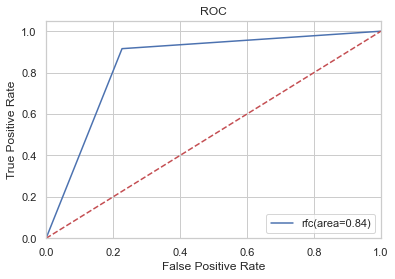

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc=roc_auc_score(y_test, best_model.predict(x_test))
fpr, tpr,thresholds=roc_curve(y_test,best_model.predict(x_test))
plt.figure
plt.plot(fpr,tpr, label="rfc(area=%0.2f)" % rfc_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("rfc_ROC")
plt.show()

In [123]:
#84 percent of the area is under the line

In [124]:
#savingThemodel
import joblib
joblib.dump(best_model,"Census.pkl")

['Census.pkl']